In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import PNT_Library as PNT
import os
import time
from mpl_toolkits.mplot3d import Axes3D

#Starting point
start_time = time.time()
codedir=os.getcwd()
print(codedir)

/Volumes/easystore/data/BSI/C-AERO/MergedFiles


In [6]:
#Bring in BSI data for plotting
dayofflight = input("What is the day of the flight? (i.e. '09/05/2017')")
BSIdir=input('What is the BSI day data directory? (i.e. [Path Directory]/C-AERO)')
os.chdir(os.path.join(BSIdir,"MergedFiles"))
filelist=os.listdir(os.path.join(BSIdir,"MergedFiles"))
filelist=filter(lambda k: not '._' in k, filelist)
filelist=filter(lambda k: '.csv' in k, filelist)
filelist=filter(lambda k: 'Lin_intpol' in k, filelist)
tempstr=str(dayofflight.replace('/','_').replace('20',''))
filelist=filter(lambda k: tempstr in k, filelist)
filename=list(filter(lambda k: not 'Snapshot' in k, filelist))
print(filename)
file=os.path.join(os.path.join(BSIdir,"MergedFiles"),str(filename[0]))
print(file)


What is the day of the flight? (i.e. '09/05/2017')09/05/2017
What is the BSI day data directory? (i.e. [Path Directory]/C-AERO)/Volumes/easystore/data/BSI/C-AERO
['Merged_BSI_Aircraft_data_with_Lin_intpolC-AERO_09_05_17.csv']
/Volumes/easystore/data/BSI/C-AERO/MergedFiles/Merged_BSI_Aircraft_data_with_Lin_intpolC-AERO_09_05_17.csv


/Users/Jaliss/anaconda/envs/python3venv/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Size of the tempcsvarray: (72445, 129)


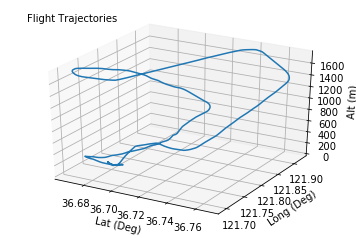

In [14]:
#Plot Time vs Flight Trajectories
tempcsvarray = pd.read_csv(file)
print("Size of the tempcsvarray: " + str(tempcsvarray.shape))
headers=tempcsvarray.dtypes.index
fig = plt.figure();
ax = fig.gca(projection='3d')
ax.plot(tempcsvarray['Lat'],tempcsvarray['Long'],tempcsvarray['NovAtel Alt (m)'], label= 'parametric curve')
ax.set_xlabel('Lat (Deg)')
ax.set_ylabel('Long (Deg)')
ax.set_zlabel('Alt (m)')
ax.text2D(0.05, 0.95, 'Flight Trajectories', transform=ax.transAxes)
plt.savefig('All3DflightRecords_'+tempstr+'.png',dpi=600)
plt.show()

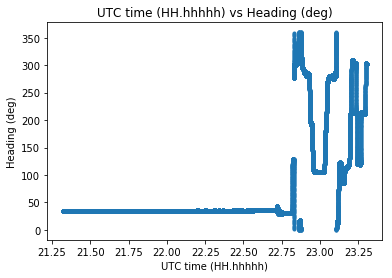

In [16]:
#Plot Time vs Heading
plt.plot(tempcsvarray['UTC time (HH.hhhhh)'],tempcsvarray['Heading (deg)'],'.')
plt.xlabel('UTC time (HH.hhhhh)')
plt.ylabel('Heading (deg)')
plt.title('UTC time (HH.hhhhh) vs Heading (deg)')
plt.savefig('AllflightHeadingRecords_'+tempstr+'.png',dpi=600)
plt.show()

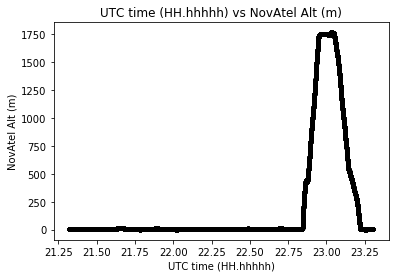

In [17]:
#Plots of Altitude vs Time
plt.plot(tempcsvarray['UTC time (HH.hhhhh)'],tempcsvarray['NovAtel Alt (m)'],'.k')
plt.xlabel('UTC time (HH.hhhhh)')
plt.ylabel('NovAtel Alt (m)')
plt.title('UTC time (HH.hhhhh) vs NovAtel Alt (m)')
plt.savefig('AllflightAltRecords_'+tempstr+'.png',dpi=600)
plt.show()

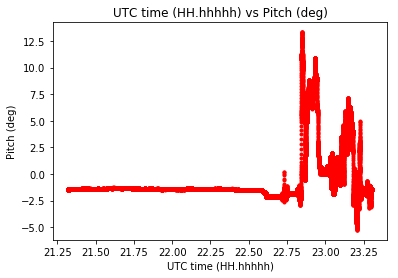

In [18]:
#Plots of Pitch Change vs Time
plt.plot(tempcsvarray['UTC time (HH.hhhhh)'],tempcsvarray['Pitch (deg)'],'.r')
plt.xlabel('UTC time (HH.hhhhh)')
plt.ylabel('Pitch (deg)')
plt.title('UTC time (HH.hhhhh) vs Pitch (deg)')
plt.savefig('AllflightPitchRecords_'+tempstr+'.png',dpi=600)
plt.show()

At which data point roughly did the transportation end and the science began?(i.e. 50000)60000
Start determining the flight heading changes
Done determining the flight heading changes


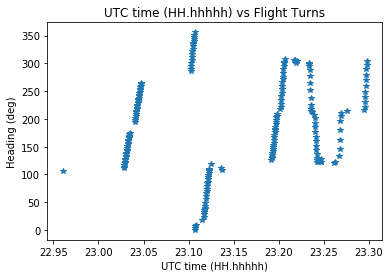

In [19]:
#Moments of heading change indicating a turn
stpt=input("At which data point roughly did the transportation end and the science began?(i.e. 50000)")
exclude_threshold=2 # delta degrees
include_threshold=0.5 # delta degrees
pre_head=tempcsvarray['Heading (deg)'][1]
rec_array=pd.DataFrame(columns=headers)
print("Start determining the flight heading changes")
for i in range(int(stpt),tempcsvarray.shape[0],10):
    cur_head=tempcsvarray['Heading (deg)'][i]
    if abs(pre_head-cur_head) > exclude_threshold:
        rec_array = rec_array.append(tempcsvarray.ix[i,:])
    pre_head=cur_head
print("Done determining the flight heading changes")
rec_array.to_csv("Recorded_Array_of_flight_turns.csv", sep=',')
plt.figure()
plt.plot(rec_array['UTC time (HH.hhhhh)'],rec_array['Heading (deg)'],'*')
plt.xlabel('UTC time (HH.hhhhh)')
plt.ylabel('Heading (deg)')
plt.title('UTC time (HH.hhhhh) vs Flight Turns')
plt.savefig('AllFlight_path_turns_'+tempstr+'.png',dpi=600)
plt.show()

Start determining the straight flight paths
Done determining the straight flight paths


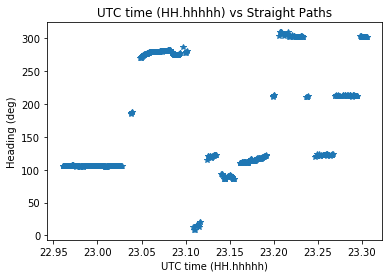

In [20]:
#Moments of heading consistency that indicate straight paths
pre_head=tempcsvarray['Heading (deg)'][1]
rec_array_2=pd.DataFrame(columns=headers)
##Filter to find all straight paths
print("Start determining the straight flight paths")
for i in range(int(stpt),tempcsvarray.shape[0],10):
    cur_head=tempcsvarray['Heading (deg)'][i]
    if abs(pre_head-cur_head) < include_threshold:
        rec_array_2 = rec_array_2.append(tempcsvarray.ix[i,:])
    pre_head=cur_head
#     print(str(i))
print("Done determining the straight flight paths")
rec_array_2.to_csv("Recorded_Array_of_flight_straights.csv", sep=',')
##Filter to clean up data for plotting
plt.plot(rec_array_2['UTC time (HH.hhhhh)'],rec_array_2['Heading (deg)'],'*')
plt.xlabel('UTC time (HH.hhhhh)')
plt.ylabel('Heading (deg)')
plt.title('UTC time (HH.hhhhh) vs Straight Paths')
plt.savefig('AllStraight_Flight_Paths_'+tempstr+'.png',dpi=600)
plt.show()

At which data point roughly did the transportation end and the science began?(i.e. 50000)60000
Start determining the flight pitch changes
Done determining the flight heading changes


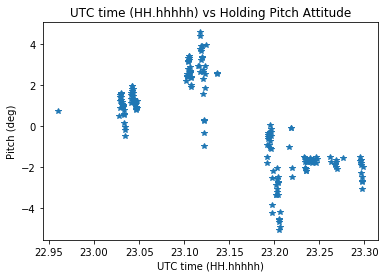

In [26]:
#Moments of elevation change
stpt=input("At which data point roughly did the transportation end and the science began?(i.e. 50000)")
exclude_threshold=2 # delta degrees
include_threshold=0.05 # delta degrees
pre_head=tempcsvarray['Pitch (deg)'][1]
rec_array_3=pd.DataFrame(columns=headers)
print("Start determining the flight pitch changes")
for i in range(int(stpt),tempcsvarray.shape[0],1):
    cur_head=tempcsvarray['Pitch (deg)'][i]
    if abs(pre_head-cur_head) < include_threshold:
        rec_array_3= rec_array_3.append(tempcsvarray.ix[i,:])
    pre_head=cur_head
print("Done determining the flight heading changes")
rec_array.to_csv("Recorded_Array_of_Holding_Pitch_Attitude.csv", sep=',')
plt.figure()
plt.plot(rec_array['UTC time (HH.hhhhh)'],rec_array['Pitch (deg)'],'*')
plt.xlabel('UTC time (HH.hhhhh)')
plt.ylabel('Pitch (deg)')
plt.title('UTC time (HH.hhhhh) vs Holding Pitch Attitude')
plt.savefig('AllFlight_Pitch_Attitude'+tempstr+'.png',dpi=600)
plt.show()